In [1]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv files 
df1=pd.read_csv("customer_data.csv")
df2=pd.read_csv("internet_data.csv")
df3=pd.read_csv("churn_data.csv")


In [3]:
#merging csv files
df=pd.merge(df1,df2,on="customerID")
data=pd.merge(df,df3,on="customerID")
print(data)
data.head()


      customerID  gender  SeniorCitizen Partner Dependents     MultipleLines  \
0     7590-VHVEG  Female              0     Yes         No  No phone service   
1     5575-GNVDE    Male              0      No         No                No   
2     3668-QPYBK    Male              0      No         No                No   
3     7795-CFOCW    Male              0      No         No  No phone service   
4     9237-HQITU  Female              0      No         No                No   
5     9305-CDSKC  Female              0      No         No               Yes   
6     1452-KIOVK    Male              0      No        Yes               Yes   
7     6713-OKOMC  Female              0      No         No  No phone service   
8     7892-POOKP  Female              0     Yes         No               Yes   
9     6388-TABGU    Male              0      No        Yes                No   
10    9763-GRSKD    Male              0     Yes        Yes                No   
11    7469-LKBCI    Male              0 

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Converting categorical values into numerical values

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]

data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)


#customerID is removed because it is not used in predective modeling 
data.pop('customerID')

#data after merging and converting into numerical values
print(data)

      gender  SeniorCitizen  Partner  Dependents  MultipleLines  \
0          1              0        1           0              0   
1          0              0        0           0              0   
2          0              0        0           0              0   
3          0              0        0           0              0   
4          1              0        0           0              0   
5          1              0        0           0              1   
6          0              0        0           1              1   
7          1              0        0           0              0   
8          1              0        1           0              1   
9          0              0        0           1              0   
10         0              0        1           1              0   
11         0              0        0           0              0   
12         0              0        1           0              1   
13         0              0        0           0              

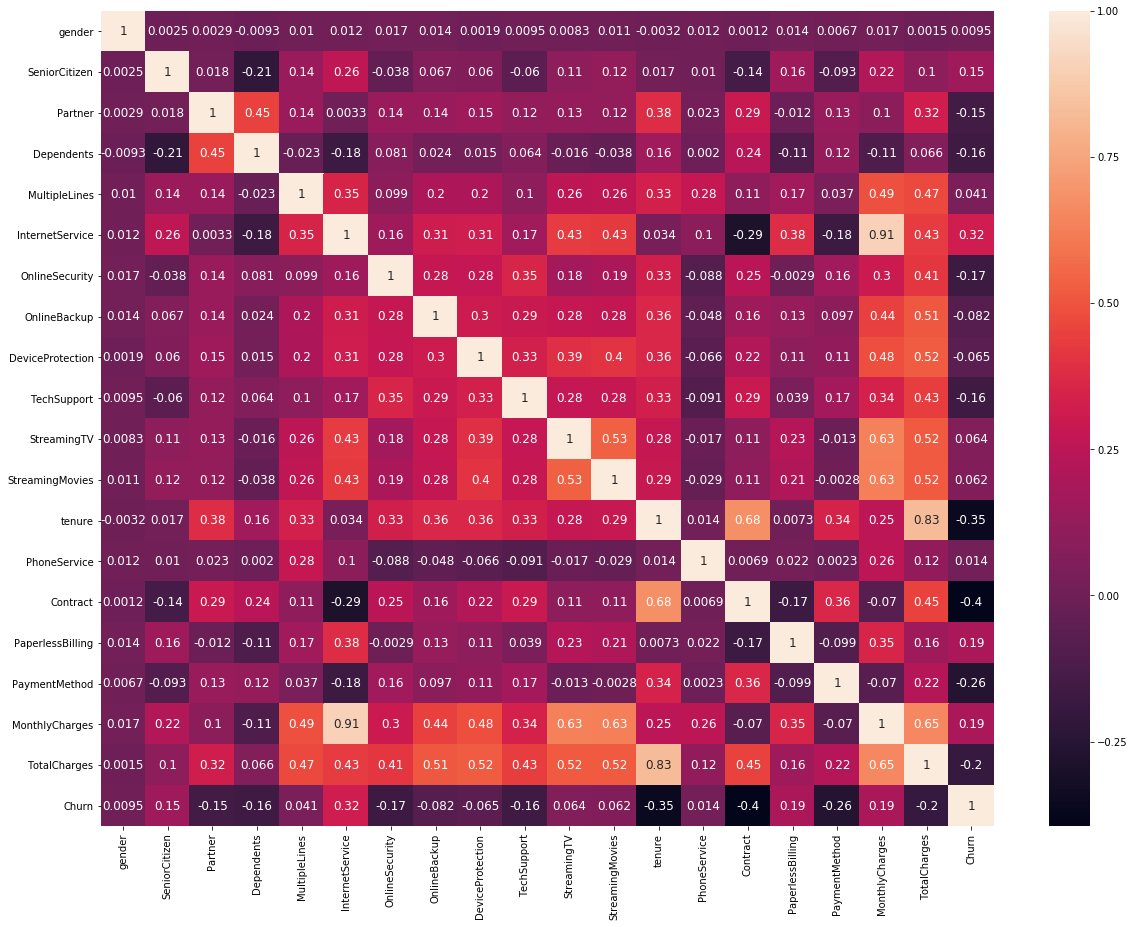

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

In [5]:
#Correlation between churn and each feature is visualised through correlation matrix

corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
corr.style.background_gradient()
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


data.pop('TotalCharges')


In [6]:
#preparing test and train data for predictive modeling

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.25)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

6201    0
5299    1
6956    0
4248    0
2905    0
5393    1
1322    0
86      0
2034    0
1097    1
3124    0
4179    0
6805    0
4217    0
1192    1
1139    0
4124    0
5699    0
4298    0
581     1
2697    0
659     0
3871    1
3372    0
2491    0
5778    0
300     0
5218    0
4417    1
6995    0
       ..
1727    0
287     1
4141    0
4205    0
1580    0
3763    1
5033    0
2155    1
6560    0
5777    0
1820    0
4530    0
5426    0
1834    1
815     0
2889    0
476     0
3899    0
4097    0
4076    0
4579    0
5593    0
3205    0
5964    0
2735    0
3739    0
1639    1
464     0
5788    0
1362    1
Name: Churn, Length: 1761, dtype: int64

In [7]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))

Intercept: [-0.84554878]
Regression: [[ 0.08899339  0.24189993  0.07416728 -0.25838929  0.28905522  0.6375934
  -0.34069176 -0.14922477  0.03086611 -0.420588    0.1083226   0.15842778
  -0.03435784 -0.73783986 -0.6937527   0.42911712 -0.15614761  0.00937811]]
Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1295
           1       0.62      0.53      0.58       466

   micro avg       0.79      0.79      0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761



c:\users\neeha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


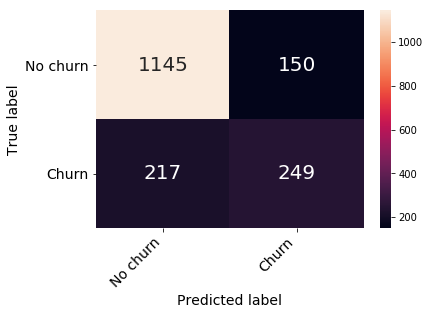

In [8]:
#confusion matrix to evaluate performance of classsification

confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()


In [9]:
#decision tree

from sklearn import tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
import graphviz 
 
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)

test_y_pred_dt = decisionTree.predict(test_x)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))



Accuracy of decision tree classifier on test set: 0.79


In [ ]:
# Generate  visual of decision tree using dot format
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(train_x.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree.dot', view=True)
